In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras

In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shelaatyamitasya","key":"83b788b24938956a26e430394076f5a6"}'}

In [ ]:
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d efoeetienneblavo/chicken-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/efoeetienneblavo/chicken-disease-dataset
License(s): unknown
 92% 244M/266M [00:00<00:00, 754MB/s] 
100% 266M/266M [00:00<00:00, 800MB/s]


In [ ]:
!unzip -q chicken-disease-dataset.zip -d chicken-disease-dataset

In [ ]:
train_dir = 'chicken-disease-dataset/chicken_disease/train'
val_dir = 'chicken-disease-dataset/chicken_disease/validation'

In [ ]:
total_train = 0
print("\nTraining Set:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_files = len(os.listdir(class_path))
        total_train += num_files
        print(f"Total File  {class_name} = {num_files}")
print("Total Train =", total_train)

total_val = 0
print("\nValidation Set:")
for class_name in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_name)
    if os.path.isdir(class_path):
        num_files = len(os.listdir(class_path))
        total_val += num_files
        print(f"Total File  {class_name} = {num_files}")
print("Total Val =", total_val)

print("\nTotal dataset =", total_train + total_val)

total_train = 0
print("\nTraining Set:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_files = len(os.listdir(class_path))
        total_train += num_files
        print(f"Total File  {class_name} = {num_files}")
print("Total Train =", total_train)





Training Set:
Total File  Healthy = 1923
Total File  New Castle Disease = 505
Total File  Coccidiosis = 1980
Total File  Salmonella = 2100
Total Train = 6508

Validation Set:
Total File  Healthy = 240
Total File  New Castle Disease = 28
Total File  Coccidiosis = 248
Total File  Salmonella = 262
Total Val = 778

Total dataset = 7286


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image (target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Ukuran gambar : {img.shape}")
  return img

Ukuran gambar : (224, 224, 3)


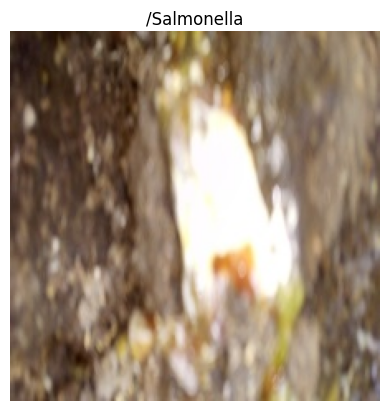

In [ ]:
img = view_random_image (train_dir, '/Salmonella')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
		rescale = 1./255,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    channel_shift_range=50.0,
		shear_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=15
)

validation_generator = validation_datagen.flow_from_directory(
	val_dir,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=15
)

Found 6508 images belonging to 4 classes.
Found 778 images belonging to 4 classes.


In [ ]:
# Mendapatkan pelabelan kelas dari generator pelatihan
train_class_indices = train_generator.class_indices
print("Pelabelan kelas dari generator pelatihan:")
print(train_class_indices)

# Mendapatkan pelabelan kelas dari generator validasi
val_class_indices = validation_generator.class_indices
print("\nPelabelan kelas dari generator validasi:")
print(val_class_indices)

Pelabelan kelas dari generator pelatihan:
{'Coccidiosis': 0, 'Healthy': 1, 'New Castle Disease': 2, 'Salmonella': 3}

Pelabelan kelas dari generator validasi:
{'Coccidiosis': 0, 'Healthy': 1, 'New Castle Disease': 2, 'Salmonella': 3}


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load the Xception model pre-trained on ImageNet, excluding the top layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

# Print the model summary
model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Setup learning rate reduction
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming you have train_data and train_labels as your training data and validation_data, val_labels for validation
# Fit the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[lr_schedule]
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,387,052 (81.59 MB)

 Trainable params: 525,572 (2.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
434/434 ━━━━━━━━━━━━━━━━━━━━ 119s 246ms/step - accuracy: 0.7578 - loss: 0.6357 - val_accuracy: 0.9049 - val_loss: 0.2888 - learning_rate: 0.0010
Epoch 2/50
434/434 ━━━━━━━━━━━━━━━━━━━━ 97s 223ms/step - accuracy: 0.8714 - loss: 0.3644 - val_accuracy: 0.9139 - val_loss: 0.2470 - learning_rate: 0.0010
Epoch 3/50
434/434 ━━━━━━━━━━━━━━━━━━━━ 98s 225ms/step - accuracy: 0.8758 - loss: 0.3534 - val_accuracy: 0.9177 - val_loss: 0.2284 - learning_rate: 0.0010
Epoch 4/50
434/434 ━━━━━━━━━━━━━━━━━━━━ 98s 227ms/step - accuracy: 0.8862 - loss: 0.3047 - val_accuracy: 0.9319 - val_loss: 0.2110 - learning_rate: 0.0010
Epoch 5/50
434/434 ━━━━━━━━━━━━━━━━━━━━ 98s 226ms/step - accuracy: 0.8911 - loss: 0.2929 - val_accuracy: 0.9165 - val_loss: 0.2339 - learning_rate: 0.0010
Epoch 6/50
434/434 ━━━━━━━━━━━━━━━━━━━━ 99s 228ms/step - accuracy: 0.8985 - loss: 0.2706 - val_accuracy: 0.9280 - val_loss: 0.1967 - learning_rate: 0.0010
Epoch 7/50
434/434 ━━━━━━━━━━━━━━━━━━━━ 99s 228ms/step - accuracy: 0.

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Mengunggah file gambar
uploaded = files.upload()

# Daftar label yang sesuai dengan kelas
class_labels = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']

for fn in uploaded.keys():
    # Path ke file gambar yang diunggah
    path = fn

    # Memuat dan memproses gambar
    img = load_img(path, target_size=(224, 224))  # Sesuaikan dengan ukuran input model Xception
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalisasi gambar

    # Melakukan prediksi menggunakan model
    predictions = model.predict(x)

    # Mengambil indeks kelas dengan nilai probabilitas tertinggi
    predicted_class_index = np.argmax(predictions)

    # Menentukan label
    predicted_label = class_labels[predicted_class_index]

    # Menampilkan hasil prediksi
    print('{} is a {}'.format(fn, predicted_label))

Saving salmo.2220.jpg to salmo.2220.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
salmo.2220.jpg is a Salmonella


Found 781 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step
Confusion Matrix
[[237   7   1   3]
 [  4 222   0  15]
 [  2   1  23   3]
 [  4   9   1 249]]
Classification Report
                    precision    recall  f1-score   support

       Coccidiosis       0.96      0.96      0.96       248
           Healthy       0.93      0.92      0.93       241
New Castle Disease       0.92      0.79      0.85        29
        Salmonella       0.92      0.95      0.93       263

          accuracy                           0.94       781
         macro avg       0.93      0.90      0.92       781
      weighted avg       0.94      0.94      0.94       781



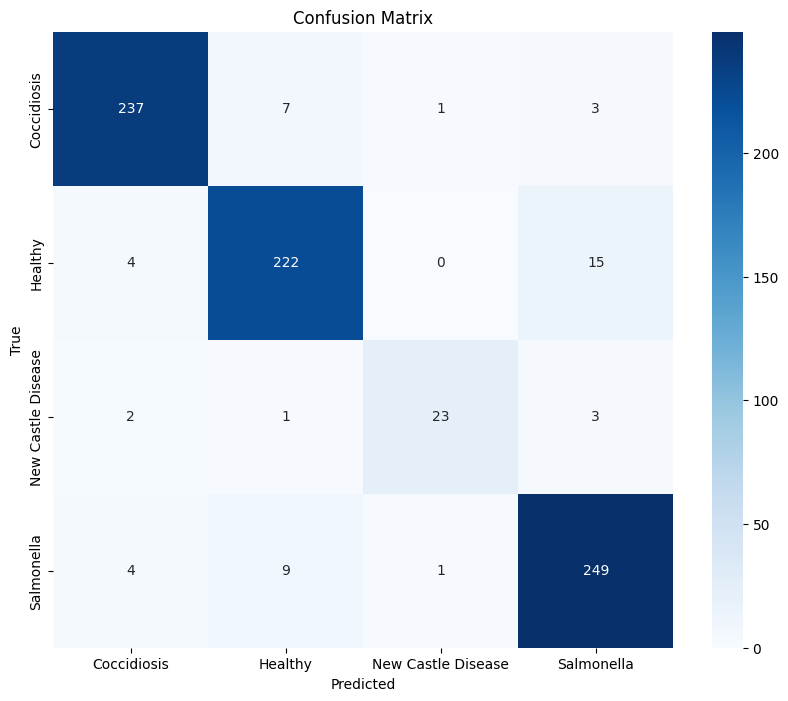

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke folder test
test_dir = 'chicken-disease-dataset/chicken_disease/test'

# Membuat ImageDataGenerator untuk test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Membuat test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',
    shuffle=False
)

# Melakukan prediksi menggunakan model pada test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Mendapatkan label sebenarnya dari test data
true_classes = test_generator.classes

# Mendapatkan label nama kelas dari generator
class_labels = list(test_generator.class_indices.keys())

# Menghitung confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix")
print(cm)

# Menghitung classification report
cr = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report")
print(cr)

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

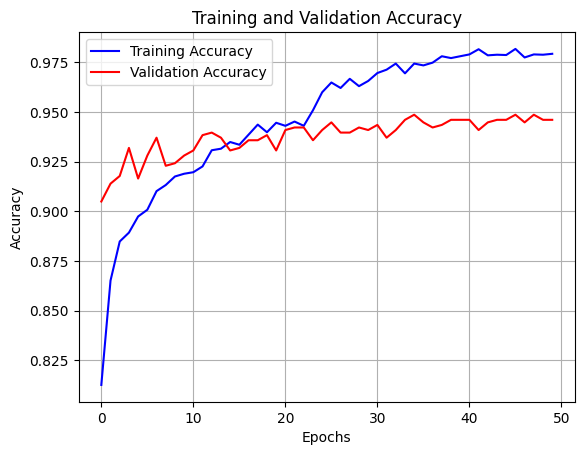

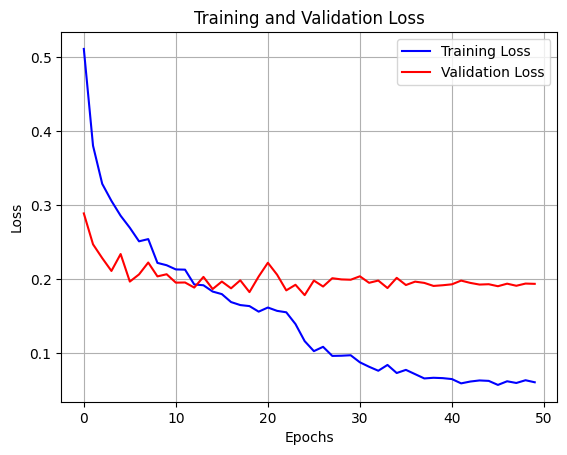

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save('modelxception.h5')

In [ ]:
from google.colab import files

uploaded = files.upload()  # Pilih satu atau beberapa gambar

Saving 1.jpg to 1 (2).jpg
Saving 2.jpg to 2 (2).jpg
Saving 3.jpg to 3 (2).jpg
Saving 4.jpg to 4 (2).jpg
Saving 5.jpg to 5 (2).jpg
Saving 6.jpg to 6 (2).jpg
Saving 7.jpg to 7 (2).jpg
Saving 8.jpg to 8 (2).jpg
Saving 9.jpg to 9 (2).jpg
Saving 10.jpg to 10 (2).jpg
Saving 11.jpg to 11 (2).jpg
Saving 12.jpg to 12 (2).jpg
Saving 13.jpg to 13 (2).jpg
Saving 14.jpg to 14 (2).jpg
Saving 15.jpg to 15 (2).jpg
Saving 16.jpg to 16 (2).jpg
Saving 17.jpg to 17 (2).jpg
Saving 18.jpg to 18 (2).jpg
Saving 19.jpg to 19 (2).jpg
Saving 20.jpg to 20 (2).jpg
Saving 21.jpg to 21 (2).jpg
Saving 22.jpg to 22 (2).jpg
Saving 23.jpg to 23 (2).jpg
Saving 24.jpg to 24 (2).jpg
Saving 25.jpg to 25 (2).jpg
Saving 26.jpg to 26 (2).jpg
Saving 27.jpg to 27 (2).jpg
Saving 28.jpg to 28 (2).jpg
Saving 29.jpg to 29 (2).jpg
Saving 30.jpg to 30 (2).jpg
Saving 31.jpg to 31 (2).jpg
Saving 32.jpg to 32 (2).jpg
Saving 33.jpg to 33 (2).jpg
Saving 34.jpg to 34 (2).jpg
Saving 35.jpg to 35 (2).jpg
Saving 36.jpg to 36 (2).jpg
Saving 37.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import pandas as pd
import os

# Load model
model = load_model('modelxception.h5')

# Label mapping sesuai urutan kelas training
labels = {0: 'Coccidiosis', 1: 'Healthy', 2: 'New Castle Disease', 3: 'Salmonella'}

results = []

# Loop semua file yang di-upload
for filename in uploaded.keys():
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img = load_img(filename, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        pred = model.predict(img_array)
        predicted_index = np.argmax(pred)
        predicted_label = labels[predicted_index]
        confidence = float(pred[0][predicted_index])

        results.append({
            'filename': filename,
            'predicted_class': predicted_label,
            'confidence': confidence
        })

# Simpan hasil ke CSV
df = pd.DataFrame(results)
df.to_csv('hasil_prediksi_upload_manual.csv', index=False)

print("✅ Hasil disimpan ke 'hasil_prediksi_upload_manual.csv'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━

In [ ]:
from google.colab import files
files.download('hasil_prediksi_upload_manual.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

# Define the path where the model was saved
destination_path = 'modelxception.h5'

# Load the model
model = tf.keras.models.load_model(destination_path)

# Save the model in the SavedModel format
saved_model_path = '/content/saved_model'
tf.saved_model.save(model, saved_model_path)

print(f"Model saved in SavedModel format at: {saved_model_path}")

Model saved in SavedModel format at: /content/saved_model


In [ ]:
!pip install tensorflowjs

In [ ]:
# Konversi saved_model ke format TensorFlow.js
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model /content/saved_model /content/tfjs_model

2025-05-17 18:03:57.393604: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747505037.426708   24983 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747505037.437120   24983 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-05-17 18:04:03.839385: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1747505043.839572   24983 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [ ]:
import shutil
from google.colab import files

# Kompres folder tfjs_model menjadi tfjs_model.zip
shutil.make_archive('tfjs_model', 'zip', '/content/tfjs_model')

# Unduh file zip
files.download('tfjs_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>